In [11]:
import sys
import csv
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from bs4 import BeautifulSoup
import re
import os 
cwd = os.getcwd()
os.chdir("C:\\#Study\\2. Ryerson_all\\THE MRP\\Dataset\\bulk_entry\\training_set\\For_senti")
cwd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Amara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'C:\\#Study\\2. Ryerson_all\\THE MRP\\Dataset\\bulk_entry\\training_set\\For_senti'

In [2]:
pattern_1 = r'@[A-Za-z0-9]+'
pattern_2 = r'https?://[A-Za-z0-9./]+'
comb_pat = r'|'.join((pattern_1, pattern_2))

def tweet_cleaner(text):
    sp = BeautifulSoup(text, 'lxml') #by using beautifulSoup package we will decode html to general text to avoid &amp, &quot
    sped = sp.get_text()
    stripped = re.sub(comb_pat, '', sped)
    try:
        clean = stripped.encode().decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    letters_only1 = letters_only.replace('RT','')

    letters_only = [word for word in letters_only.split() if word not in stopwords.words('english') + ['amp'] + ['u']]
    lower_case = letters_only1.lower() #Here we will get white spaces those are not necessary, we need to tokenize and join these to remove these white spaces. 
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [12]:
all_train = pd.read_csv("after_dup_senti.csv", encoding="latin-1")

In [16]:
all_train.tail()

,score,text,retail,polarity,clean_text
21069,1,@WalmartCanada @_jere @walmarthelp ItÃÂs act...,Walmart,neutral,jere it s actually jere who is the customer i ...
21070,-2,@WalmartCanada what the heck? I bought a pair...,Walmart,negative,what the heck i bought a pair of pants and sho...
21071,0,@WalmartCanada @walmarthelp what is going to t...,Walmart,neutral,what is going to take to find out about sensit...
21072,2,@WalmartCanada I love honeycomb cereal! Its ma...,Walmart,positive,i love honeycomb cereal its magically delicious
21073,-2,@WalmartCanada the worst place to order anythi...,Walmart,negative,the worst place to order anything online cance...


In [15]:
#Remove unnecessary column from dataframe.
all_train.drop(['Unnamed: 0', 'Unnamed: 5'],  axis=1, inplace=True)

In [8]:
sum(all_train.retail.value_counts())

21074

In [9]:
all_train.polarity.value_counts()

neutral     15430
negative     2903
positive     2741
Name: polarity, dtype: int64

In [13]:
all_train['clean_text'] = all_train['text'].apply(lambda x : tweet_cleaner(x))

C:\Users\Amara\Anaconda2\envs\py36\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/QJjeg2triC" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Amara\Anaconda2\envs\py36\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/MpWe7GZ0ly" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Amara\Anaconda2\envs\py36\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/WRzdcPaspg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beauti

In [81]:
cnt_vectorizer  = CountVectorizer()
train_set_X = cnt_vectorizer.fit_transform(all_train['clean_text'].values.astype('U'))


In [18]:
train_set_Y = np.where(all_train.polarity == 'positive', 1, 
         (np.where(all_train.polarity == 'negative', 2, 3)))

In [19]:
train_set_Y

array([1, 3, 1, ..., 3, 1, 2])

In [20]:
kfold = KFold(n_splits = 5, shuffle = True, random_state=1234)

In [21]:
print (train_set_Y.shape)
print (train_set_X.shape)

(21074,)
(21074, 18363)


In [22]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [23]:
from IPython.display import Image

In [24]:
log_cnt_mdl = LogisticRegressionCV()
log_count_score = cross_val_score(log_cnt_mdl,
                                  train_set_X, train_set_Y,
                                  scoring = 'accuracy',
                                  cv = kfold.split(train_set_X),
                                  n_jobs=-1).mean()
print (log_count_score)

0.8831262565441638


In [25]:
svc_count_model = LinearSVC()
svc_count_score = cross_val_score(svc_count_model,
                                  train_set_X, train_set_Y,
                                  scoring = 'accuracy',
                                  cv = kfold.split(train_set_X),
                                  n_jobs=-1).mean()
print (svc_count_score)

0.8789976922656837


In [26]:
nb_count_model = MultinomialNB()
nb_count_score = cross_val_score(nb_count_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X,),
                                 n_jobs=-1).mean()
print (nb_count_score)

0.7906423653629291


In [27]:
gb_count_model = GradientBoostingClassifier()
gb_count_score = cross_val_score(gb_count_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X),
                                 n_jobs=-1).mean()
print (gb_count_score)

0.8044507575437689


In [28]:
rf_count_model = RandomForestClassifier()
rf_count_score = cross_val_score(rf_count_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X),
                                 n_jobs=-1).mean()
print (rf_count_score)

0.8528990018584608


In [29]:
# TF-IDF Vectorizer

In [31]:
#Create a list of cleaned tweets
tweets = all_train.clean_text.values.astype('U')

In [79]:
tfidf_vectorizer = TfidfVectorizer(stop_words=None, max_features=17000, ngram_range=(1, 3))
train_set_X = tfidf_vectorizer.fit_transform(tweets) #Transform tweets list into TF-IDV vector

In [33]:
log_tfidf_model = LogisticRegressionCV()
log_tfidf_score = cross_val_score(log_tfidf_model,
                                  train_set_X, train_set_Y,
                                  scoring = 'accuracy',
                                  cv = kfold.split(train_set_X),
                                  n_jobs=-1).mean()
print (log_tfidf_score)

0.8506683759326787


In [34]:
svc_tfidf_model = LinearSVC()
svc_tfidf_score = cross_val_score(svc_tfidf_model,
                                  train_set_X, train_set_Y,
                                  scoring = 'accuracy',
                                  cv = kfold.split(train_set_X),
                                  n_jobs=-1).mean()
print (svc_count_score)

0.8789976922656837


In [35]:
nb_tfidf_model = MultinomialNB()
nb_tfidf_score = cross_val_score(nb_tfidf_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X,),
                                 n_jobs=-1).mean()
print (nb_tfidf_score)

0.7578054510722605


In [36]:
gb_tfidf_model = GradientBoostingClassifier()
gb_tfidf_score = cross_val_score(gb_tfidf_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X),
                                 n_jobs=-1).mean()
print (gb_tfidf_score)

0.8049725903768774


In [37]:
rf_tfidf_model  = RandomForestClassifier()
rf_tfidf_score = cross_val_score(rf_tfidf_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X),
                                 n_jobs=-1).mean()
print (rf_tfidf_score)

0.8440729962431053


In [ ]:
selected_model = LinearSVC().fit(train_set_X, train_set_Y)

In [39]:
result = {
    'label' : ['log_count_score' , 'svc_count_score',
               'nb_count_score', 'gb_count_score',
              'rf_count_score', 'log_tfidf_score',
              'svc_tfidf_score', 'nb_tfidf_score',
              'gb_tfidf_score', 'rf_tfidf_score',
              ],
    'score' : [log_count_score , svc_count_score,
               nb_count_score, gb_count_score,
              rf_count_score, log_tfidf_score,
              svc_tfidf_score, nb_tfidf_score,
              gb_tfidf_score, rf_tfidf_score]
}

df_result = pd.DataFrame(result)
display(df_result.sort_values('score', ascending=False))

,label,score
0,log_count_score,0.883126
1,svc_count_score,0.878998
4,rf_count_score,0.852899
5,log_tfidf_score,0.850668
6,svc_tfidf_score,0.848533
9,rf_tfidf_score,0.844073
8,gb_tfidf_score,0.804973
3,gb_count_score,0.804451
2,nb_count_score,0.790642
7,nb_tfidf_score,0.757805


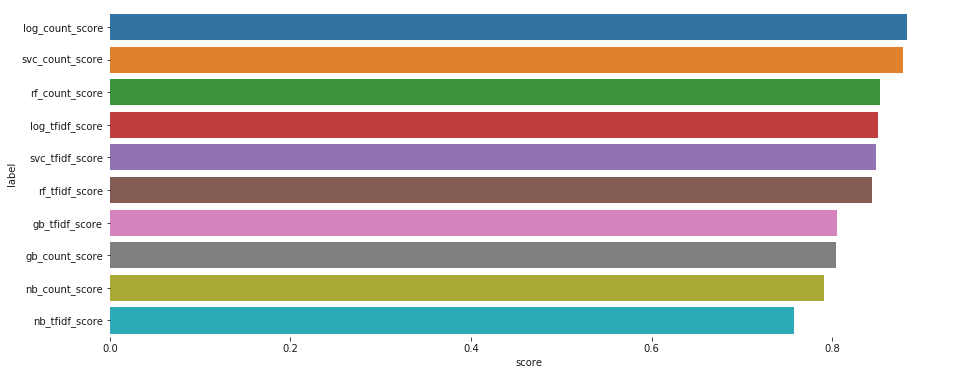

In [40]:
import  seaborn  as sns
df_result = df_result.sort_values('score', ascending=False)
f, ax = plt.subplots(figsize=(15, 6))
sns.set_color_codes("pastel")
ax = sns.barplot(x='score', y='label', data=df_result, orient='h')
sns.despine(left=True, bottom=True)

In [41]:
#oversampling
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

ROS_pl = make_pipeline(cnt_vectorizer, RandomOverSampler(random_state=777),log_cnt_mdl)
SMOTE_pl = make_pipeline(cnt_vectorizer, SMOTE(random_state=777),log_cnt_mdl)
ADASYN_pl = make_pipeline(cnt_vectorizer, ADASYN(ratio='minority',random_state=777),log_cnt_mdl)

In [42]:
def find_accuracy(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lnr_fit = pipeline.fit(X[train], Y[train])
        pred = lnr_fit.predict(X[test])
        scr = lnr_fit.score(X[test],Y[test])
        
        accuracy.append(scr * 100)
        precision.append(precision_score(Y[test], pred, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], pred, average=None))
        recall.append(recall_score(Y[test], pred, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], pred, average=None))
        f1.append(f1_score(Y[test], pred, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], pred, average=None))
        print('-'*50)

    print("avg. accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("avg. precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("avg. recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("avg. f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [43]:
count_lr_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', log_cnt_mdl)
])

In [44]:
find_accuracy(5, all_train.clean_text, all_train.polarity, count_lr_pipeline, 'macro')

              negative    neutral     positive
precision: [0.85158151 0.8850133  0.92180095]
recall:    [0.60240964 0.97018795 0.70856102]
f1 score:  [0.70564516 0.92564539 0.80123584]
--------------------------------------------------
              negative    neutral     positive
precision: [0.83651226 0.87635511 0.91494253]
recall:    [0.52839931 0.96921581 0.72627737]
f1 score:  [0.64767932 0.9204493  0.80976602]
--------------------------------------------------
              negative    neutral     positive
precision: [0.83732057 0.89041505 0.91741071]
recall:    [0.60240964 0.96629942 0.75      ]
f1 score:  [0.7007007  0.92680653 0.8253012 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.83835616 0.88400236 0.92841649]
recall:    [0.52758621 0.97051199 0.7810219 ]
f1 score:  [0.64761905 0.92523942 0.84836472]
--------------------------------------------------
              negative    neutral     positive
precision

In [45]:
count_svc_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', svc_count_model)
])

In [47]:
find_accuracy(5, all_train.clean_text, all_train.polarity, count_svc_pipeline, 'macro')

              negative    neutral     positive
precision: [0.78719008 0.89700894 0.83231084]
recall:    [0.65576592 0.9426442  0.74134791]
f1 score:  [0.71549296 0.91926055 0.78420039]
--------------------------------------------------
              negative    neutral     positive
precision: [0.78818737 0.9002486  0.82806324]
recall:    [0.66609294 0.93875567 0.76459854]
f1 score:  [0.72201493 0.91909898 0.79506641]
--------------------------------------------------
              negative    neutral     positive
precision: [0.79915433 0.89953632 0.83629191]
recall:    [0.65060241 0.94296824 0.77372263]
f1 score:  [0.71726755 0.92074039 0.80379147]
--------------------------------------------------
              negative    neutral     positive
precision: [0.77300613 0.90665002 0.85440613]
recall:    [0.65172414 0.94102398 0.81386861]
f1 score:  [0.70720299 0.92351725 0.83364486]
--------------------------------------------------
              negative    neutral     positive
precision

In [48]:
count_nb_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', nb_count_model)
])

In [49]:
find_accuracy(5, all_train.clean_text, all_train.polarity, count_nb_pipeline, 'macro')

              negative    neutral     positive
precision: [0.72156863 0.82124646 0.71229698]
recall:    [0.31669535 0.93940376 0.55919854]
f1 score:  [0.44019139 0.87636034 0.62653061]
--------------------------------------------------
              negative    neutral     positive
precision: [0.82101167 0.82778091 0.71875   ]
recall:    [0.36316695 0.95009721 0.54562044]
f1 score:  [0.50357995 0.88473144 0.62033195]
--------------------------------------------------
              negative    neutral     positive
precision: [0.72289157 0.82379994 0.65708419]
recall:    [0.30981067 0.9287103  0.58394161]
f1 score:  [0.43373494 0.873115   0.61835749]
--------------------------------------------------
              negative    neutral     positive
precision: [0.81205674 0.84425754 0.71900826]
recall:    [0.39482759 0.94329229 0.6350365 ]
f1 score:  [0.53132251 0.89103153 0.6744186 ]
--------------------------------------------------
              negative    neutral     positive
precision

In [50]:
count_gb_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', gb_count_model)
])

In [51]:
find_accuracy(5, all_train.clean_text, all_train.polarity, count_gb_pipeline, 'macro')

              negative    neutral     positive
precision: [0.83333333 0.79661017 0.96624473]
recall:    [0.20654045 0.98995463 0.41712204]
f1 score:  [0.33103448 0.8828204  0.5826972 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.79104478 0.79452412 0.95528455]
recall:    [0.18244406 0.98736228 0.42883212]
f1 score:  [0.2965035  0.8805086  0.59193955]
--------------------------------------------------
              negative    neutral     positive
precision: [0.78321678 0.79581152 0.93253968]
recall:    [0.19277108 0.98509397 0.42883212]
f1 score:  [0.30939227 0.88039386 0.5875    ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.80921053 0.79686275 0.95780591]
recall:    [0.21206897 0.98768633 0.41423358]
f1 score:  [0.33606557 0.88207206 0.57834395]
--------------------------------------------------
              negative    neutral     positive
precision

In [52]:
count_rf_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', rf_count_model)
])

In [53]:
find_accuracy(5, all_train.clean_text, all_train.polarity, count_rf_pipeline, 'macro')

              negative    neutral     positive
precision: [0.80298507 0.84966025 0.93696275]
recall:    [0.46299484 0.97245625 0.59562842]
f1 score:  [0.58733624 0.90692052 0.72828508]
--------------------------------------------------
              negative    neutral     positive
precision: [0.8031746  0.8396861  0.90662651]
recall:    [0.43545611 0.97083603 0.54927007]
f1 score:  [0.56473214 0.90051097 0.68409091]
--------------------------------------------------
              negative    neutral     positive
precision: [0.80864198 0.84611048 0.92419825]
recall:    [0.45094664 0.9727803  0.57846715]
f1 score:  [0.57900552 0.90503467 0.71156004]
--------------------------------------------------
              negative    neutral     positive
precision: [0.82991202 0.85381777 0.94      ]
recall:    [0.48793103 0.97472456 0.60036496]
f1 score:  [0.6145494  0.91027387 0.73273942]
--------------------------------------------------
              negative    neutral     positive
precision

In [ ]:
#Check model score with TFIDF vectorizer

In [54]:
tfidf_lr_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', log_tfidf_model)
])

In [55]:
find_accuracy(5, all_train.clean_text, all_train.polarity, tfidf_lr_pipeline, 'macro')

              negative    neutral     positive
precision: [0.83933518 0.87588028 0.89485459]
recall:    [0.52151463 0.96727155 0.72859745]
f1 score:  [0.6433121  0.91931013 0.80321285]
--------------------------------------------------
              negative    neutral     positive
precision: [0.81648936 0.86950147 0.86946387]
recall:    [0.52839931 0.96079067 0.68065693]
f1 score:  [0.6415883  0.91286946 0.76356192]
--------------------------------------------------
              negative    neutral     positive
precision: [0.78186275 0.87953251 0.86170213]
recall:    [0.54905336 0.95106935 0.73905109]
f1 score:  [0.64509606 0.91390316 0.7956778 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.84657534 0.86375395 0.92972973]
recall:    [0.53275862 0.97375243 0.62773723]
f1 score:  [0.65396825 0.91546078 0.74945534]
--------------------------------------------------
              negative    neutral     positive
precision

In [56]:
tfidf_svc_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', svc_tfidf_model)
])

In [57]:
find_accuracy(5, all_train.clean_text, all_train.polarity, tfidf_svc_pipeline, 'macro')

              negative    neutral     positive
precision: [0.8102981  0.87268994 0.89726027]
recall:    [0.51462995 0.96403111 0.71584699]
f1 score:  [0.62947368 0.9160893  0.79635258]
--------------------------------------------------
              negative    neutral     positive
precision: [0.80989583 0.87433314 0.85776805]
recall:    [0.53528399 0.95593001 0.71532847]
f1 score:  [0.64455959 0.91331269 0.7800995 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.79840849 0.87418398 0.86111111]
recall:    [0.51807229 0.95463383 0.73540146]
f1 score:  [0.62839248 0.91263941 0.79330709]
--------------------------------------------------
              negative    neutral     positive
precision: [0.80729167 0.87985655 0.8553719 ]
recall:    [0.53448276 0.95398574 0.75547445]
f1 score:  [0.64315353 0.91542289 0.80232558]
--------------------------------------------------
              negative    neutral     positive
precision

In [58]:
tfidf_nb_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', nb_tfidf_model)
])

In [59]:
find_accuracy(5, all_train.clean_text, all_train.polarity, tfidf_nb_pipeline, 'macro')

              negative    neutral     positive
precision: [0.96774194 0.74914925 0.95774648]
recall:    [0.05163511 0.99870382 0.12386157]
f1 score:  [0.09803922 0.85611111 0.21935484]
--------------------------------------------------
              negative    neutral     positive
precision: [1.         0.75115656 0.98630137]
recall:    [0.06024096 0.99967596 0.13138686]
f1 score:  [0.11363636 0.8577784  0.23188406]
--------------------------------------------------
              negative    neutral     positive
precision: [1.         0.75085241 0.9625    ]
recall:    [0.04991394 0.99902787 0.14051095]
f1 score:  [0.09508197 0.85734149 0.24522293]
--------------------------------------------------
              negative    neutral     positive
precision: [1.         0.75378603 1.        ]
recall:    [0.05862069 1.         0.15693431]
f1 score:  [0.11074919 0.85961003 0.27129338]
--------------------------------------------------
              negative    neutral     positive
precision

In [60]:
tfidf_gb_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', gb_tfidf_model)
])

In [61]:
find_accuracy(5, all_train.clean_text, all_train.polarity, tfidf_gb_pipeline, 'macro')

              negative    neutral     positive
precision: [0.84496124 0.79677335 0.97131148]
recall:    [0.18760757 0.99222294 0.43169399]
f1 score:  [0.30704225 0.88382162 0.59773014]
--------------------------------------------------
              negative    neutral     positive
precision: [0.824      0.79350649 0.9625    ]
recall:    [0.17728055 0.98995463 0.42153285]
f1 score:  [0.2917847  0.88091119 0.58629442]
--------------------------------------------------
              negative    neutral     positive
precision: [0.80392157 0.79868594 0.92217899]
recall:    [0.21170396 0.98476993 0.43248175]
f1 score:  [0.33514986 0.88202003 0.58881988]
--------------------------------------------------
              negative    neutral     positive
precision: [0.77631579 0.79779701 0.95582329]
recall:    [0.20344828 0.98574206 0.43430657]
f1 score:  [0.32240437 0.88186694 0.59723965]
--------------------------------------------------
              negative    neutral     positive
precision

In [62]:
tfidf_rf_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', rf_tfidf_model)
])

In [63]:
find_accuracy(5, all_train.clean_text, all_train.polarity, tfidf_rf_pipeline, 'macro')

              negative    neutral     positive
precision: [0.82246377 0.83365464 0.9579288 ]
recall:    [0.39070568 0.9808814  0.53916211]
f1 score:  [0.52975496 0.90129522 0.68997669]
--------------------------------------------------
              negative    neutral     positive
precision: [0.79738562 0.83578772 0.93548387]
recall:    [0.41996558 0.97472456 0.52919708]
f1 score:  [0.55016911 0.89992521 0.67599068]
--------------------------------------------------
              negative    neutral     positive
precision: [0.81612903 0.84335664 0.95454545]
recall:    [0.43545611 0.97699287 0.57481752]
f1 score:  [0.56790123 0.90526948 0.71753986]
--------------------------------------------------
              negative    neutral     positive
precision: [0.78963415 0.84206105 0.96507937]
recall:    [0.44655172 0.97440052 0.55474453]
f1 score:  [0.57048458 0.90340994 0.70451912]
--------------------------------------------------
              negative    neutral     positive
precision

In [64]:
#Check accuracy score after applying over sampling with logistic regression classifier

In [65]:
find_accuracy(5, all_train.clean_text, all_train.polarity, ROS_pl, 'macro')

              negative    neutral     positive
precision: [0.7405303  0.89741935 0.70578231]
recall:    [0.67297762 0.9014906  0.75591985]
f1 score:  [0.70513977 0.89945037 0.7299912 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.77358491 0.9097769  0.68759812]
recall:    [0.70567986 0.89857421 0.79927007]
f1 score:  [0.73807381 0.90414085 0.73924051]
--------------------------------------------------
              negative    neutral     positive
precision: [0.74705882 0.90223373 0.71103896]
recall:    [0.65576592 0.90311082 0.79927007]
f1 score:  [0.6984418  0.90267206 0.75257732]
--------------------------------------------------
              negative    neutral     positive
precision: [0.72242647 0.91195795 0.73801917]
recall:    [0.67758621 0.89954634 0.84306569]
f1 score:  [0.69928826 0.90570962 0.78705281]
--------------------------------------------------
              negative    neutral     positive
precision

In [66]:
find_accuracy(5, all_train.clean_text, all_train.polarity, SMOTE_pl, 'macro')

              negative    neutral     positive
precision: [0.70774648 0.90215264 0.7233677 ]
recall:    [0.6919105  0.8963059  0.76684882]
f1 score:  [0.6997389  0.89921977 0.74447392]
--------------------------------------------------
              negative    neutral     positive
precision: [0.72280702 0.91117764 0.69014085]
recall:    [0.7091222  0.88755671 0.80474453]
f1 score:  [0.71589922 0.89921208 0.74304971]
--------------------------------------------------
              negative    neutral     positive
precision: [0.74505929 0.89996763 0.7016129 ]
recall:    [0.64888124 0.90084251 0.79379562]
f1 score:  [0.69365225 0.90040486 0.74486301]
--------------------------------------------------
              negative    neutral     positive
precision: [0.70331588 0.9153051  0.7258567 ]
recall:    [0.69482759 0.88950097 0.85036496]
f1 score:  [0.69904597 0.90221857 0.78319328]
--------------------------------------------------
              negative    neutral     positive
precision

In [67]:
find_accuracy(5, all_train.clean_text, all_train.polarity, ADASYN_pl, 'macro')

              negative    neutral     positive
precision: [0.83802817 0.89687796 0.71243942]
recall:    [0.61445783 0.92158134 0.80327869]
f1 score:  [0.70903674 0.90906185 0.75513699]
--------------------------------------------------
              negative    neutral     positive
precision: [0.80973451 0.90636099 0.6996997 ]
recall:    [0.62994836 0.9095917  0.85036496]
f1 score:  [0.70861568 0.90797348 0.76771005]
--------------------------------------------------
              negative    neutral     positive
precision: [0.81755196 0.90439771 0.72826087]
recall:    [0.60929432 0.91963707 0.85583942]
f1 score:  [0.69822485 0.91195373 0.78691275]
--------------------------------------------------
              negative    neutral     positive
precision: [0.81192661 0.90580645 0.70648968]
recall:    [0.61034483 0.90991575 0.87408759]
f1 score:  [0.69685039 0.90785645 0.78140294]
--------------------------------------------------
              negative    neutral     positive
precision

In [68]:
#Check accuracy score after applying over sampling with Linear SVC classifier

In [69]:
ROS_pl_svc = make_pipeline(cnt_vectorizer, RandomOverSampler(random_state=777),svc_count_model)
SMOTE_pl_svc = make_pipeline(cnt_vectorizer, SMOTE(random_state=777),svc_count_model)
ADASYN_pl_svc = make_pipeline(cnt_vectorizer, ADASYN(ratio='minority',random_state=777),svc_count_model)

In [70]:
find_accuracy(5, all_train.clean_text, all_train.polarity, ROS_pl_svc, 'macro')

              negative    neutral     positive
precision: [0.74169742 0.90497592 0.76028623]
recall:    [0.6919105  0.91348023 0.77413479]
f1 score:  [0.71593945 0.90920819 0.76714801]
--------------------------------------------------
              negative    neutral     positive
precision: [0.74460432 0.91145833 0.74787053]
recall:    [0.71256454 0.9073234  0.80109489]
f1 score:  [0.72823219 0.90938616 0.77356828]
--------------------------------------------------
              negative    neutral     positive
precision: [0.74716981 0.90812379 0.75986278]
recall:    [0.68158348 0.91283215 0.80839416]
f1 score:  [0.71287129 0.91047188 0.78337754]
--------------------------------------------------
              negative    neutral     positive
precision: [0.74205607 0.91397849 0.7557377 ]
recall:    [0.68448276 0.90894362 0.84124088]
f1 score:  [0.71210762 0.9114541  0.79620035]
--------------------------------------------------
              negative    neutral     positive
precision

In [71]:
find_accuracy(5, all_train.clean_text, all_train.polarity, SMOTE_pl_svc, 'macro')

              negative    neutral     positive
precision: [0.7155477  0.90432503 0.71070234]
recall:    [0.69707401 0.89436163 0.77413479]
f1 score:  [0.70619006 0.89931574 0.74106364]
--------------------------------------------------
              negative    neutral     positive
precision: [0.72473868 0.91146007 0.67592593]
recall:    [0.71600688 0.88399222 0.79927007]
f1 score:  [0.72034632 0.89751604 0.73244147]
--------------------------------------------------
              negative    neutral     positive
precision: [0.7495183  0.90805718 0.72815534]
recall:    [0.66953528 0.90570318 0.82116788]
f1 score:  [0.70727273 0.90687865 0.77186964]
--------------------------------------------------
              negative    neutral     positive
precision: [0.70826011 0.9148012  0.7101227 ]
recall:    [0.69482759 0.88723266 0.84489051]
f1 score:  [0.70147955 0.90080605 0.77166667]
--------------------------------------------------
              negative    neutral     positive
precision

In [72]:
find_accuracy(5, all_train.clean_text, all_train.polarity, ADASYN_pl_svc, 'macro')

              negative    neutral     positive
precision: [0.78205128 0.89589303 0.70840198]
recall:    [0.62994836 0.91186001 0.78324226]
f1 score:  [0.69780744 0.90380601 0.74394464]
--------------------------------------------------
              negative    neutral     positive
precision: [0.7761807  0.90319426 0.67424242]
recall:    [0.65060241 0.89792612 0.8120438 ]
f1 score:  [0.70786517 0.90055249 0.73675497]
--------------------------------------------------
              negative    neutral     positive
precision: [0.77412281 0.89635317 0.70300158]
recall:    [0.60757315 0.90797148 0.8120438 ]
f1 score:  [0.68081003 0.90212492 0.75359865]
--------------------------------------------------
              negative    neutral     positive
precision: [0.76875    0.90693134 0.7065053 ]
recall:    [0.6362069  0.90311082 0.85218978]
f1 score:  [0.69622642 0.90501705 0.77253929]
--------------------------------------------------
              negative    neutral     positive
precision

In [73]:
result = {
    'label' : ['log_count_score' , 'svc_count_score',
               'nb_count_score', 'gb_count_score',
              'rf_count_score', 'log_tfidf_score',
              'svc_tfidf_score', 'nb_tfidf_score',
              'gb_tfidf_score', 'rf_tfidf_score',
              ],
    'score' : [log_count_score , svc_count_score,
               nb_count_score, gb_count_score,
              rf_count_score, log_tfidf_score,
              svc_tfidf_score, nb_tfidf_score,
              gb_tfidf_score, rf_tfidf_score]
}

df_result = pd.DataFrame(result)
display(df_result.sort_values('score', ascending=False))

,label,score
0,log_count_score,0.883126
1,svc_count_score,0.878998
4,rf_count_score,0.852899
5,log_tfidf_score,0.850668
6,svc_tfidf_score,0.848533
9,rf_tfidf_score,0.844073
8,gb_tfidf_score,0.804973
3,gb_count_score,0.804451
2,nb_count_score,0.790642
7,nb_tfidf_score,0.757805


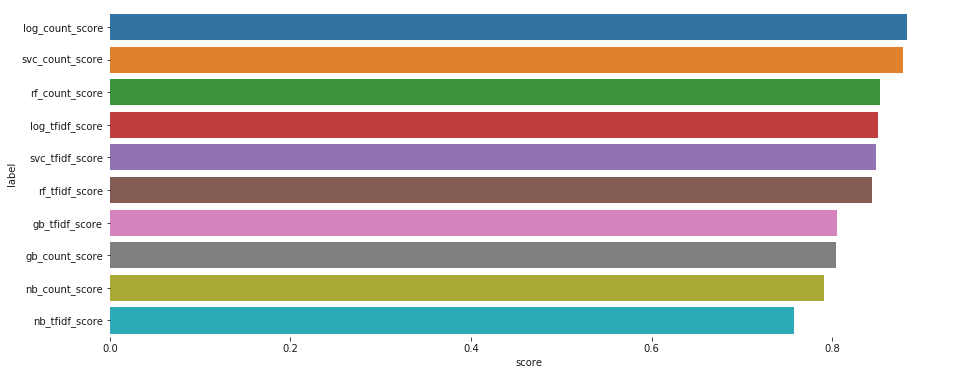

In [74]:
import  seaborn  as sns
df_result = df_result.sort_values('score', ascending=False)
f, ax = plt.subplots(figsize=(15, 6))
sns.set_color_codes("pastel")
ax = sns.barplot(x='score', y='label', data=df_result, orient='h')
sns.despine(left=True, bottom=True)

In [84]:
selected_model = LinearSVC().fit(train_set_X, train_set_Y)

In [85]:
def RetSenti(tweet):
    cleaned_tweet =  tweet_cleaner(tweet)
    X_test = cnt_vectorizer.transform(np.array([cleaned_tweet]))
    if selected_model.predict(X_test)[0] == 1:
        return Image(filename='positive.jpg', width = 100, height =70)
    elif selected_model.predict(X_test)[0] == 2:
        return Image(filename='neg.jpg', width = 100, height =70)
    else:
        return Image(filename='net.jpg', width = 100, height =70)

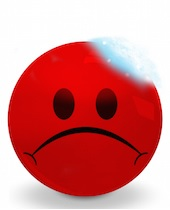

In [86]:
RetSenti("the worst retail")

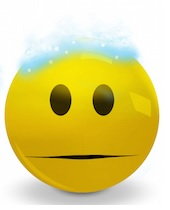

In [87]:
RetSenti("@CanadianTire please tell me I can pick up my new lawnmower with 1600cc<ed><U+00A0><U+00BE><ed><U+00B4><U+00A4>. I NEED THIS!! Ã‚Â“Que Tim the Toolman gruntÃ‚Â” https://t.co/8KWqX3frzf")

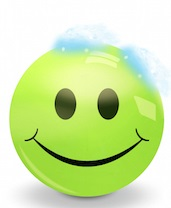

In [88]:
RetSenti("Thank you walmart")

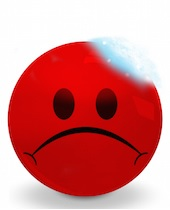

In [90]:
RetSenti("@aflood2005 @CanadianTire @CBC That is happening everywhere now. All customers are treated like criminals because sÃ‚Â… https://t.co/oR8HjPShiF")

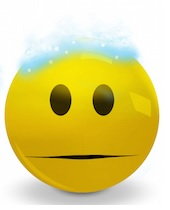

In [91]:
RetSenti("RT @pothen: (5/? ) What can we do quickly? Improve main Danforth  and Danforth Dawes intersection.  Extend #biketo down Dawes. @CanadianTirÃ‚Â…")

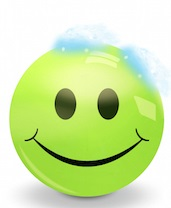

In [92]:
RetSenti("@cmcdavid97 @CanadianTire you r so inspiring to me")